### Snapp Pay!


Anomaly detection Using Z-Score:

You have data for SnappGroup! customers. You are asked to calculate the z-score for each customer and, based on these z-scores, determine which customers are outliers in terms of high default risk.


In [2]:
# Import the following libraries:
# pandas, seaborn and matplotlib.pyplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Load the data using pandas and take an initial overview.


In [7]:
# Load the data
df = pd.read_csv('snapp.csv')
# Initial overview
print("Dataset Overview:")
print(df.describe())
df.head(5)

Dataset Overview:
               POD  AvgSpentOnSnappFood
count  4943.000000         4.943000e+03
mean      0.408462         3.340350e+06
std       0.268665         5.454590e+05
min       0.006607         5.230000e+05
25%       0.131747         3.158243e+06
50%       0.392075         3.434853e+06
75%       0.672626         3.644786e+06
max       0.993979         6.312409e+06


,POD,AvgSpentOnSnappFood
0,0.095239,2.931748e+06
1,0.105493,3.517870e+06
2,0.123370,3.481772e+06
3,0.141007,3.531373e+06
4,0.102860,3.440841e+06


Let's create some visualizations to gain more insights into the data:


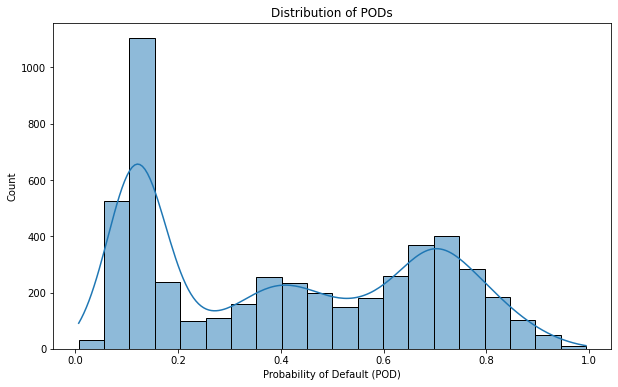

In [41]:
# For PODs
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='POD', bins=20, kde=True)
plt.title('Distribution of PODs')
plt.xlabel('Probability of Default (POD)')
plt.ylabel('Count')
plt.show()


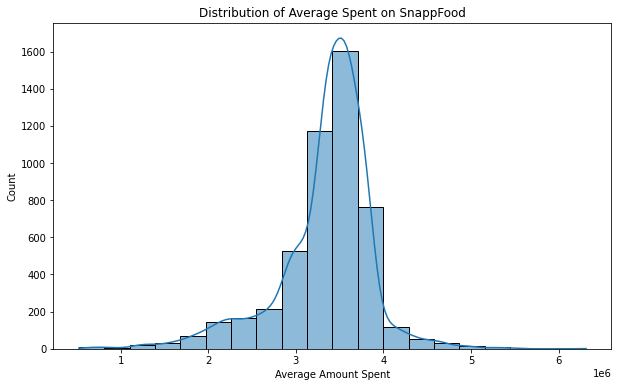

In [42]:
# For AvgSpentOnSnappFood
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AvgSpentOnSnappFood', bins=20, kde=True)
plt.title('Distribution of Average Spent on SnappFood')
plt.xlabel('Average Amount Spent')
plt.ylabel('Count')
plt.show()

According to z-score formula, calculate the z-score for the 'AvgSpentOnSnappFood' column per user,
<br/>
and add the z-score values as a new column named "z-score" to the data


In [29]:
df['z-score'] = (df['AvgSpentOnSnappFood'] - df['AvgSpentOnSnappFood'].mean()) / df['AvgSpentOnSnappFood'].std()


Plot the distribution of z-scores:


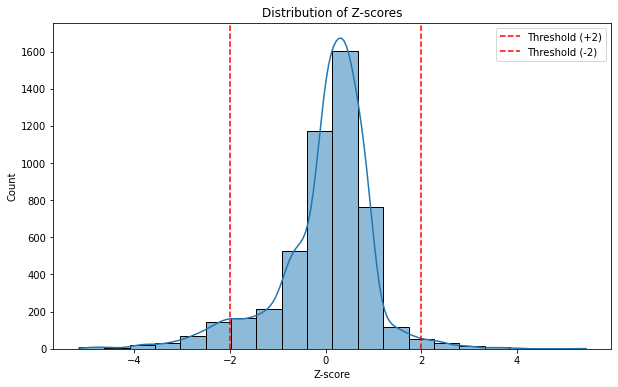

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='z_score', bins=20, kde=True)
plt.title('Distribution of Z-scores')
plt.xlabel('Z-score')
plt.ylabel('Count')
plt.axvline(x=2, color='r', linestyle='--', label='Threshold (+2)')
plt.axvline(x=-2, color='r', linestyle='--', label='Threshold (-2)')
plt.legend()
plt.show()




We want to analyze the behavior of abnormal users.
<br/>
How we can detect anomalies based on z-score? Find them and store them in a new dataframe called "anomalies"!


In [43]:
threshold = 2
anomalies = df[abs(df['z_score']) > threshold]
print("\nNumber of anomalies detected:", len(anomalies))
print("\nAnomalies Details:")
print(anomalies)


Number of anomalies detected: 346

Anomalies Details:
           POD  AvgSpentOnSnappFood   z-score   z_score
3311  0.684346         4.656675e+06  2.413242  2.413242
3314  0.243685         1.701763e+06 -3.004051 -3.004051
3318  0.707240         2.213700e+06 -2.065508 -2.065508
3324  0.734207         1.917182e+06 -2.609120 -2.609120
3327  0.721162         1.903801e+06 -2.633651 -2.633651
...        ...                  ...       ...       ...
4902  0.687823         4.445622e+06  2.026315  2.026315
4903  0.695354         4.436583e+06  2.009745  2.009745
4905  0.692852         4.472784e+06  2.076112  2.076112
4929  0.877633         5.314783e+06  3.619765  3.619765
4936  0.239901         1.719701e+06 -2.971166 -2.971166

[346 rows x 4 columns]


Now the final move, plot the PODs for abnormal users.
<br/>
What does it mean? Write your opinion


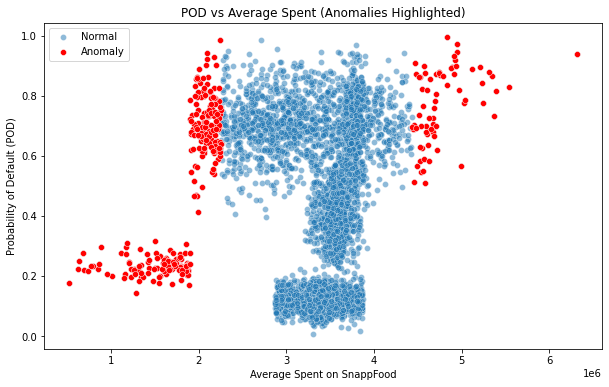

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AvgSpentOnSnappFood', y='POD', alpha=0.5, label='Normal')
sns.scatterplot(data=anomalies, x='AvgSpentOnSnappFood', y='POD', color='red', label='Anomaly')
plt.title('POD vs Average Spent (Anomalies Highlighted)')
plt.xlabel('Average Spent on SnappFood')
plt.ylabel('Probability of Default (POD)')
plt.legend()
plt.show()


YOUR OPINION HERE:

Analysis Opinion:
The analysis reveals several interesting patterns:
1.	Z-Score Distribution: Values beyond ±2 standard deviations are considered anomalies, representing unusual spending patterns.

2.	Relationship Between Spending and Default Risk:

•	Users with extremely high spending might indicate either very loyal customers or potential fraudulent activity

•	The POD (Probability of Default) for anomalous users helps identify high-risk customers

•	This information can be used for:

o	Risk management

o	Customer segmentation

o	Fraud detection

o	Targeted marketing campaigns

3.	Business Implications:

•	High spenders with low POD could be valuable customers worth nurturing

•	High spenders with high POD might need additional monitoring

•	This analysis can help in developing better credit risk models and customer engagement strategies

The z-score method effectively identifies outliers in spending patterns, providing valuable insights for risk management and customer behavior analysis.



### Thank you!